# 1. EDA

## データセット読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
# from scipy.stats import norm    #確率分布関連
# from scipy import stats    #統計関連
# from scipy.special import boxcox1p
from scipy import stats
from scipy import special
%matplotlib inline

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 500)

df_train = pd.read_csv("train_test_submission/train.csv", index_col=0)
df_test = pd.read_csv("train_test_submission/test.csv", index_col=0)

print(f"df_train.shape: {df_train.shape}")
display(df_train.head(3))
print(f"df_train.shape: {df_test.shape}")
display(df_test.head(3))

df_train.shape: (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


df_train.shape: (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


## ydata_profilingを使う場合（普段はコメントアウト。時間かかるので注意）

In [2]:
# # ydata_profilingを使う場合

# from ydata_profiling import ProfileReport
# profile = ProfileReport(df_train, minimal=True)
# profile.to_file("ydata_profiling/kaggle_houseprices.html")

## 目的変数(SalePrice)の特徴把握

---------- describe ----------
count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64
歪度(Skewness: 1.8828757597682129)
尖度(Kurtosis: 6.536281860064529)


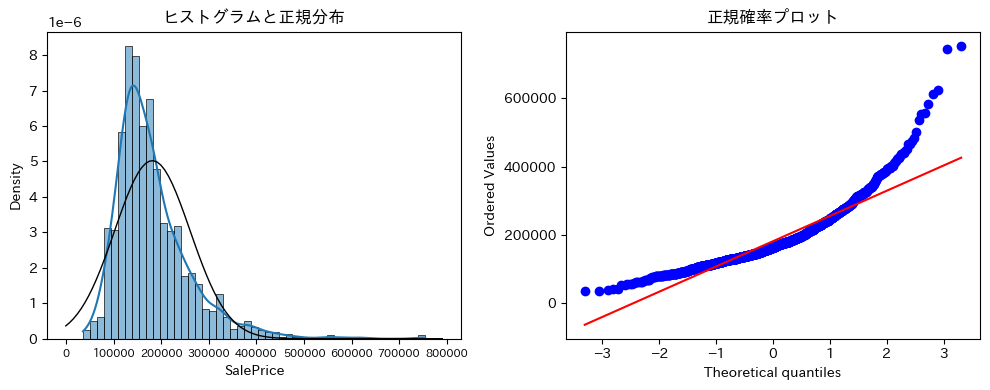

In [3]:
data = df_train["SalePrice"]

# 目的変数（SalePrice）の基本統計量を表示
print("-" * 10, "describe", "-" * 10)
print(round(data.describe(), 1))

# 歪度と尖度
skewness = data.skew()
kurtosis = data.kurtosis()
print(f"歪度(Skewness: {skewness})")
print(f"尖度(Kurtosis: {kurtosis})")

# グラフ描写
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data, stat="density", kde=True, ax=ax[0])
ax[0].set_title("ヒストグラムと正規分布")
ax[0].tick_params(axis="x", labelsize=8)  # 軸の文字サイズ変更

# 正規分布を重ねて表示（黒線）
xmin, xmax = ax[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(data), np.std(data))
ax[0].plot(x, p, "k", linewidth=1)

# 正規確率プロットを表示するサブプロット
res = stats.probplot(data, plot=ax[1])
ax[1].set_title("正規確率プロット")

plt.tight_layout()
plt.show()

# ・歪度 (skewness) の絶対値が 1.88 と高い
# ・ヒストグラムの正規分布線 (黒線) と KDE のズレが発生
# ・QQプロット線 (青線) が正規分布線 (赤線) からズレが発生
# 以上３点からSalePriceが正規分布に対して歪んでいることが分かる。
# 正規分布から歪んでいると、機械学習の精度の低下につながる。

## SalePriceと他の特徴量との関係

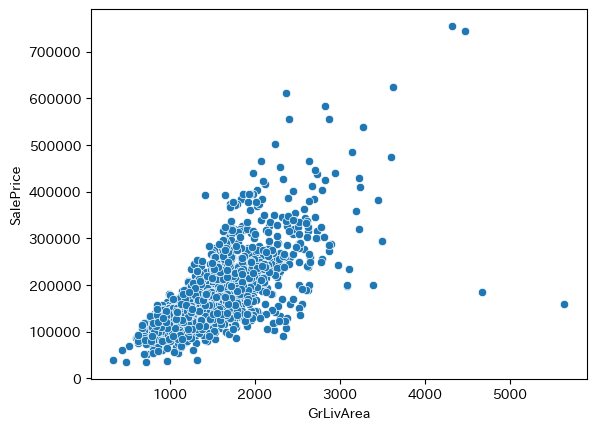

In [4]:
# GrLivArea	地上（地上）の生活エリアの平方フィート。
ax = sns.scatterplot(data=df_train, x="GrLivArea", y="SalePrice")

# 右下に2つ大きく傾向から外れた値がある。
# この２点は住居エリアが広くて、住宅価格が安い
# おそらく郊外のエリア。外れ値の候補として考えておく

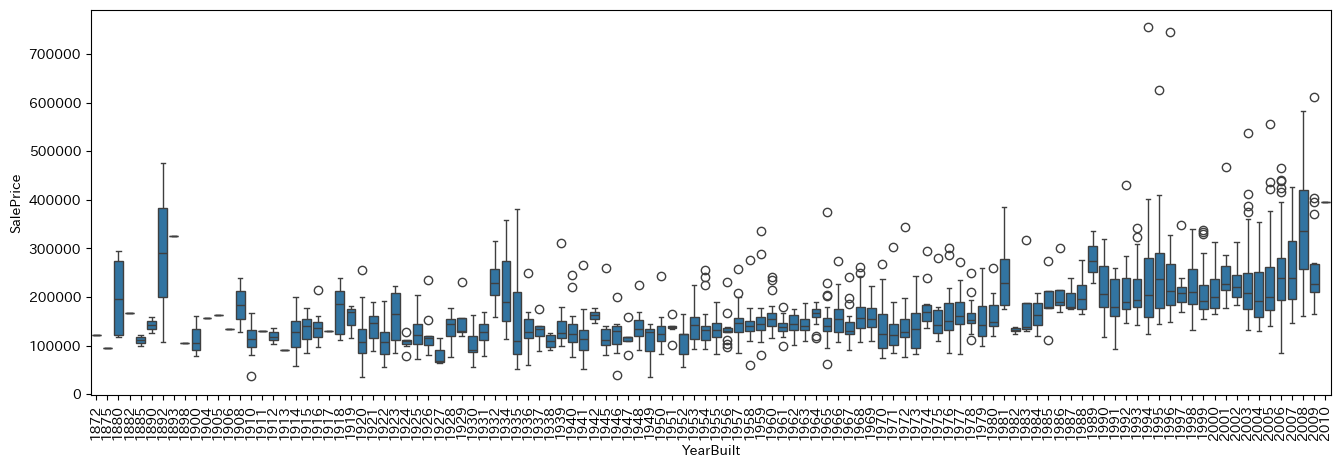

In [5]:
# YearBuilt 建築年
plt.figure(figsize=(16, 5))
ax = sns.boxplot(data=df_train, x="YearBuilt", y="SalePrice")
plt.xticks(rotation=90)
plt.show()
# 意外とあまり傾向が見えない？

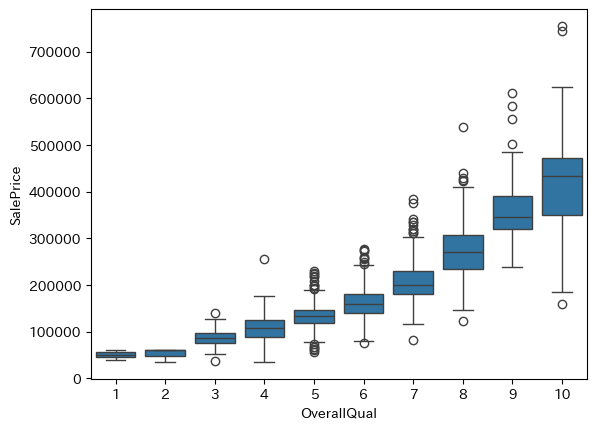

In [6]:
# OverallQual：	全体的な材料と仕上げの品質。
ax = sns.boxplot(data=df_train, x="OverallQual", y="SalePrice")

## 相関係数

<Axes: >

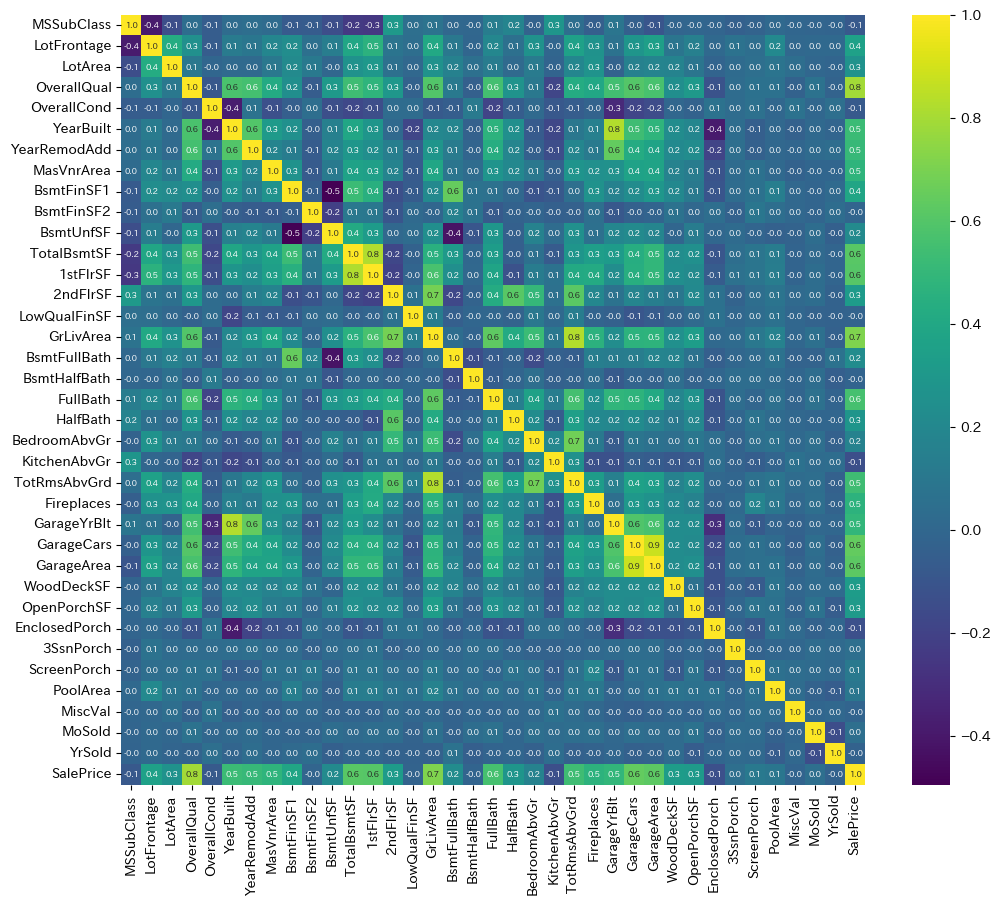

In [7]:
# すべての特徴量について
plt.figure(figsize=(12, 10))
sns.heatmap(
    df_train.corr(numeric_only=True),
    cmap="viridis",
    annot=True,
    fmt=".1f",
    annot_kws={"fontsize": 6},
)

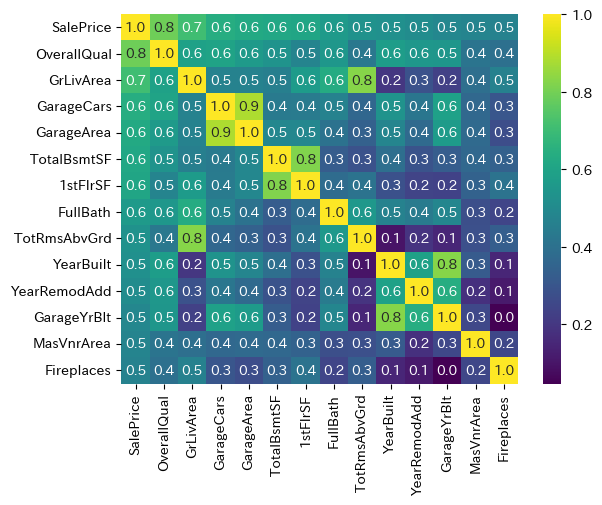

In [8]:
# SalePriceとの相関がある特徴量のみについて

threshold = 0.4  # 相関係数の閾値
high_corr_cols = (
    df_train.corr(numeric_only=True)["SalePrice"][
        abs(df_train.corr(numeric_only=True)["SalePrice"]) >= threshold
    ]
    .sort_values(ascending=False)
    .index
)

sns.heatmap(
    df_train[high_corr_cols].corr(),
    cmap="viridis",
    annot=True,
    fmt=".1f",
    annot_kws={"fontsize": 10},
)
plt.show()

# 方針：特徴量同士で相関係数が高い項目に関しては、片方を除外、もしくは、別の特徴量を検討
# GarageCarsが多ければ、GarageAreaが多いのも必然のためGarageAreaは除外
# GrLivArea(地上の生活エリア)が広ければ、TotRmsAbvGrd(地上の部屋数)も多くなるのが一般的なので、TotRmsAbvGrdは除外
# 車庫と建物が同時に建設されることが一般的なので、YearBuiltとGarageYrBltが相関が高くなっていると考えられるため、GarageYrBitは除外

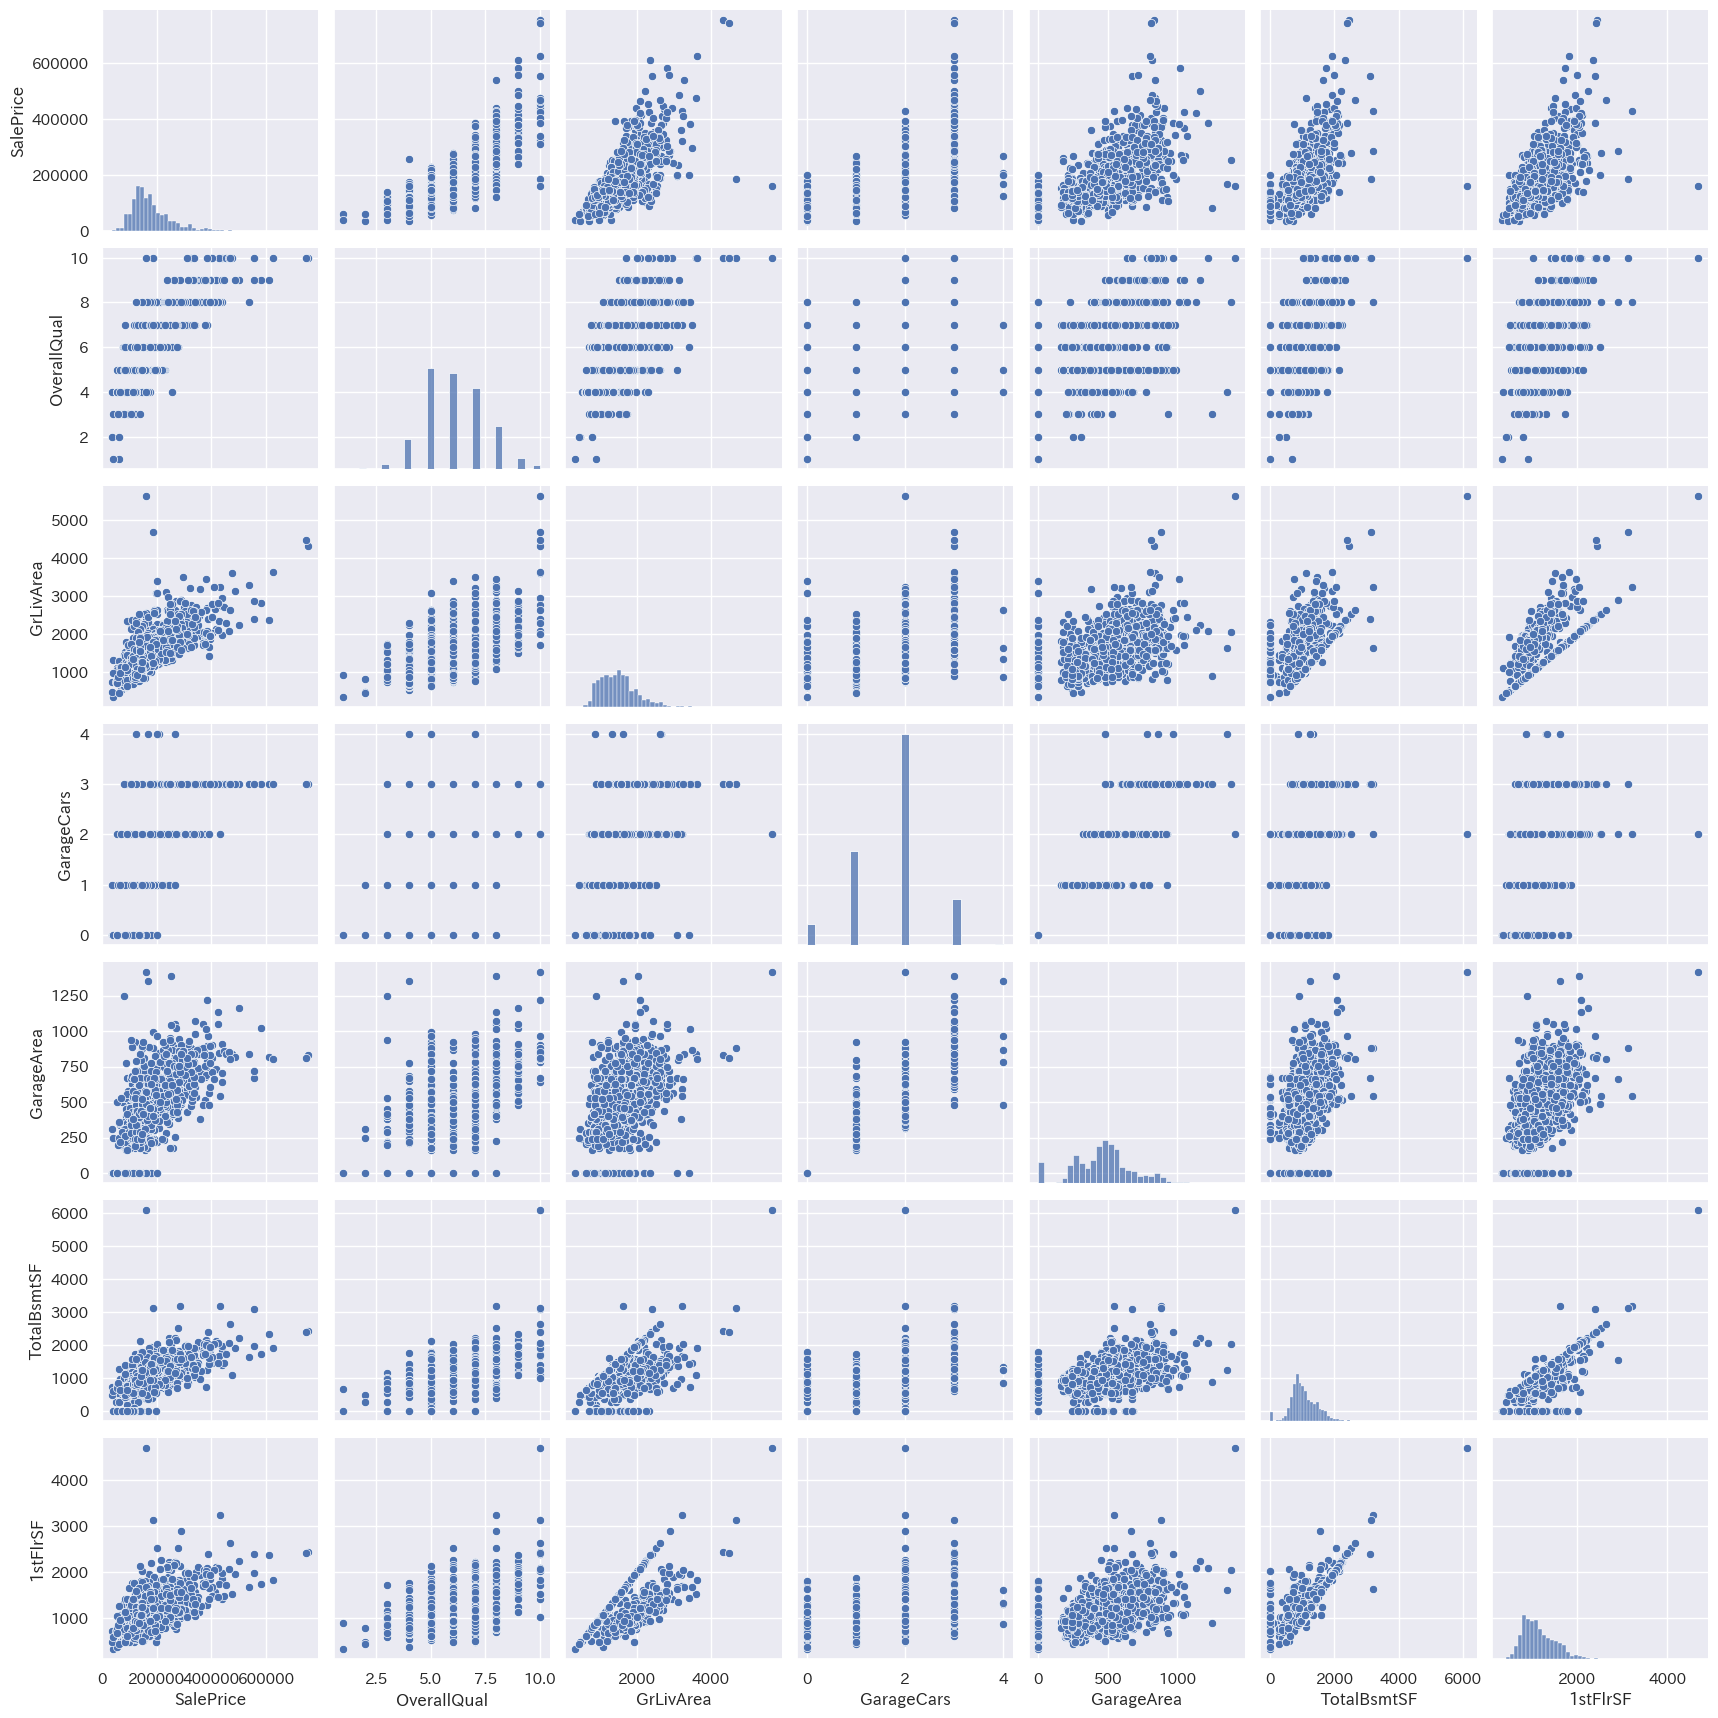

In [9]:
# scatterplot
threshold = 0.6  # 相関係数の閾値
high_corr_cols = (
    df_train.corr(numeric_only=True)["SalePrice"][
        abs(df_train.corr(numeric_only=True)["SalePrice"]) >= threshold
    ]
    .sort_values(ascending=False)
    .index
)

sns.set(
    font="IPAexGothic"
)  # ここでフォントを指定しておかないと、後のグラフ描画にて日本語が文字化けする
sns.pairplot(df_train[high_corr_cols], height=2.5)
plt.show()

# 2. 前処理

## 欠損値処理

In [10]:
# DataFrameを結合
df_all_data = pd.concat([df_train, df_test])

# 欠損値の数を計算
missing_values_count = df_all_data.isna().sum()
missing_values_table = pd.DataFrame(
    {
        "Missing_total": missing_values_count,
        "Percent (%)": round(missing_values_count / len(df_all_data) * 100, 2),
    }
)

# 欠損値の割合順で並べ替え
df_missing = missing_values_table[
    missing_values_table["Missing_total"] > 0
].sort_values(by="Missing_total", ascending=False)
# 処理法を決めるのに使う作業用csvを出力
df_data_description = pd.read_csv(
    "data_description/data_description_日本語.csv", index_col=0
)
df_missing_value_processing = pd.concat([df_missing, df_data_description], axis=1)
# encoding="utf-8_sig"を付けることでexcelで開いたときの文字化けを回避
df_missing_value_processing.to_csv(
    "missing_value_processing/missing_value_processing_欠損値処理.csv",
    encoding="utf-8_sig",
)

display(df_missing)

,Missing_total,Percent (%)
PoolQC,2909,99.66
MiscFeature,2814,96.40
Alley,2721,93.22
Fence,2348,80.44
MasVnrType,1766,60.50
SalePrice,1459,49.98
FireplaceQu,1420,48.65
LotFrontage,486,16.65
GarageCond,159,5.45
GarageYrBlt,159,5.45


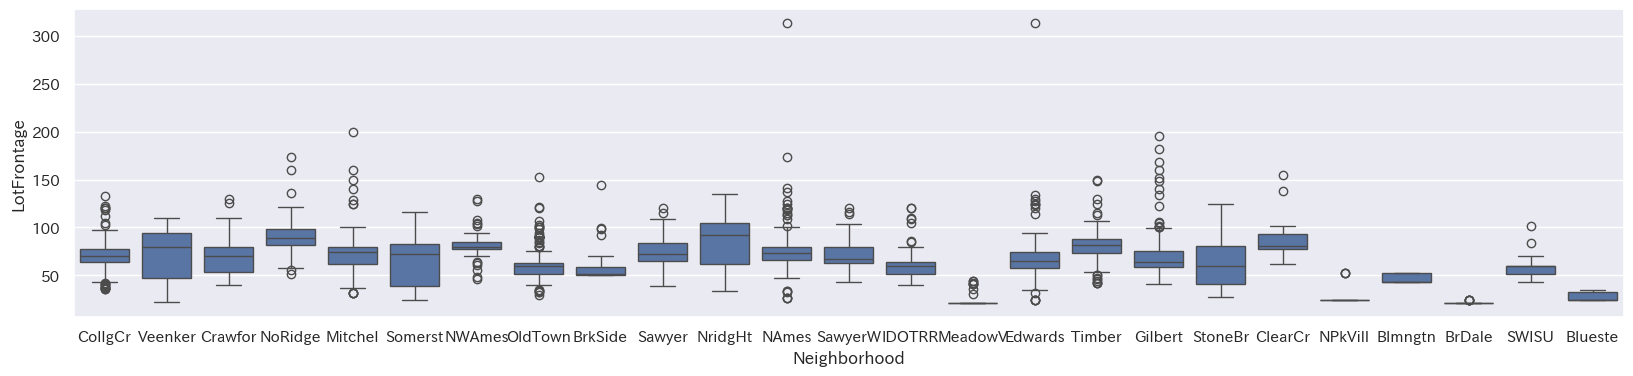

In [11]:
# "LotFrontage"について
plt.figure(figsize=(20, 4))
sns.boxplot(data=df_all_data, x="Neighborhood", y="LotFrontage")
plt.show()
# 下の結果から、地域ごとに"LotFrontage"の値にばらつきがあることが分かる

In [12]:
# 各地域"Neighborhood"の"LotFrontage"の中央値
df_group_LotFrontage = df_all_data.groupby(by="Neighborhood")["LotFrontage"].agg(
    "median"
)


def fillnaLot(row):
    """
    ある1つの住宅データについて、"LotFrontage"列の値が欠損している場合はそのデータの地域（"Neighborhood"）の"LotFrontage"の中央値で補完。
    欠損していない場合、元の値をそのまま返す。

    Parameter
    ----------
    row : pandas.core.frame.DataFrame
        欠損値処理をしたいデータセット

    Return
    ----------
    欠損値処理がされたLotFrontage行が返ってくる
    """
    # もし"LotFrontage"が欠損値（NaN）または空文字列の場合
    # NaN	「何もないよー」な意味をあらわす単語
    # 空文字列	長さ0文字の文字列のこと
    # でもisnaは空文字列""を欠損値として認識するはずだけど…？取り敢えず教材通りに書いておく

    if pd.isna(row["LotFrontage"]) or row["LotFrontage"] == "":
        return df_group_LotFrontage[row["Neighborhood"]]
    else:
        return row["LotFrontage"]

In [13]:
######## ミュータブル操作とイミュータブル操作 #########

# イミュータブル（不変）とミュータブル（可変）の操作の違いが関係しています。以下の例を使って詳細を説明します。

# 例1: ミュータブル操作
# df[col] = df[col].fillna("None")は、データフレームの列を直接変更します。この場合、データフレームの列はミュータブルなオブジェクトであり、変更は元のデータフレームに反映されます。

# 例2: イミュータブル操作
# df = df.drop('Utilities', axis=1)は、元のデータフレームを変更せずに、新しいデータフレームを作成してdfに代入します。この場合、元のデータフレームは変更されません。

# もう少し具体的に比較すると：

# ミュータブル操作（列の変更）
# for df in datasets:
#     for col in cols_fillNone:
#         df[col] = df[col].fillna("None")
# このループでは、df[col]はdatasets内の各データフレームの特定の列を参照しており、fillnaを適用してその列を更新しています。この変更はdatasetsの元のデータフレームに反映されます。

# イミュータブル操作（データフレーム全体の置換）
# for i in range(len(datasets)):
#     datasets[i] = datasets[i].drop('Utilities', axis=1)
# このループでは、dropメソッドは新しいデータフレームを生成します。datasets[i]をその新しいデータフレームに更新することで、元のデータフレームも更新されます。

# したがって、以下のようにインデックスを使って元のデータフレームを更新すれば、Utilities列を削除する操作も期待通りに動作します。

# for i in range(len(datasets)):
#     if 'Utilities' in datasets[i].columns:
#         datasets[i] = datasets[i].drop('Utilities', axis=1)

In [14]:
datasets = [df_train, df_test]

# LotFrontageの穴埋め
for df in datasets:
    df["LotFrontage"] = df.apply(fillnaLot, axis=1)

# Noneで穴埋めするもの
cols_fillNone = [
    "PoolQC",
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu",
    "GarageCond",
    "GarageQual",
    "GarageFinish",
    "GarageType",
    "BsmtCond",
    "BsmtExposure",
    "BsmtQual",
    "BsmtFinType1",
    "BsmtFinType2",
]
# 0で穴埋めするもの
cols_fill0 = [
    "GarageYrBlt",
    "MasVnrArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "GarageCars",
    "GarageArea",
    "TotalBsmtSF",
    "BsmtUnfSF",
    "BsmtFinSF2",
    "BsmtFinSF1",
]
# 最頻値で穴埋めをするもの
cols_fillmode = [
    "MasVnrType",
    "MSZoning",
    "Functional",
    "Electrical",
    "KitchenQual",
    "Exterior2nd",
    "Exterior1st",
    "SaleType",
]

# ミュータブルとイミュータブルな操作が混じってるけど、まとめて対応するために以下のfor文を構築した
for i in range(len(datasets)):
    for col in cols_fillNone:
        datasets[i][col] = datasets[i][col].fillna("None")

    for col in cols_fill0:
        datasets[i][col] = datasets[i][col].fillna(0)

    for col in cols_fillmode:
        datasets[i][col] = datasets[i][col].fillna(datasets[i][col].mode()[0])

    # UtilitiesはAllPubが99.9%であり分析に使えないので列を削除
    if "Utilities" in datasets[i].columns:
        datasets[i] = datasets[i].drop("Utilities", axis=1)

In [15]:
# 欠損値が補完できたことを確認するため、もう一度欠損値割合を出力する

# df_train, df_testの内容を更新する
df_train, df_test = datasets  # アンパック

# DataFrameを結合
df_all_data = pd.concat([df_train, df_test])

# 欠損値の数を計算
missing_values_count = df_all_data.isna().sum()
missing_values_table = pd.DataFrame(
    {
        "Missing_total": missing_values_count,
        "Percent (%)": round(missing_values_count / len(df_all_data) * 100, 2),
    }
)

# 欠損値の割合順で並べ替え
df_missing = missing_values_table[
    missing_values_table["Missing_total"] > 0
].sort_values(by="Missing_total", ascending=False)

display(df_missing)

# SalePrice以外の欠損値が全て消えており、補完が上手く言ったことが分かる

,Missing_total,Percent (%)
SalePrice,1459,49.98


## 外れ値の取り扱い

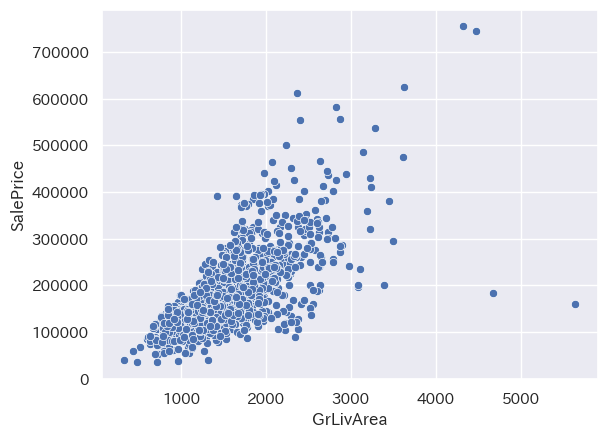

In [16]:
# GrLivArea	地上（地上）の生活エリアの平方フィート。
ax = sns.scatterplot(data=df_train, x="GrLivArea", y="SalePrice")

before deleting: (1460, 79)
after deleting: (1458, 79)


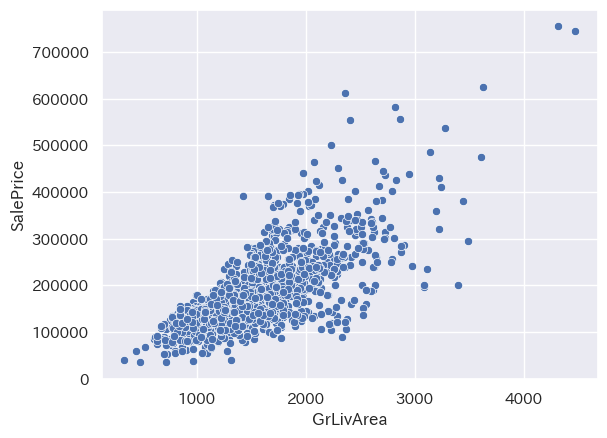

In [17]:
# 右下の2点は面積が広いのに価格がとても安い。恐らく郊外のエリアであり、予測モデルにおいては傾向を邪魔すると考えられるため除外する
del_index = df_train.nlargest(2, "GrLivArea").index
print(f"before deleting: {df_train.shape}")
df_train = df_train.drop(del_index, axis=0)
print(f"after deleting: {df_train.shape}")
ax = sns.scatterplot(data=df_train, x="GrLivArea", y="SalePrice")
# グラフからも、右下の外れ値が除去できていることが確認できる

## 特徴量エンジニアリング

### 新しい特徴量'TotalSF'の作成

In [18]:
# 新しい特徴量（'TotalSF'：'TotalBsmtSF'、'1stFlrSF'、'2ndFlrSF'を合計したもの）の作成
datasets = [df_train, df_test]

for df in datasets:
    print(f"Before making: {df.shape}")
    df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
    print((f"After making: {df.shape}\n"))

# それぞれ、特徴量が1つずつ増えていることが分かる
# 教材だとこの時点で特徴量が243個とかになっている…多分それ、one-hot encodingした後の値になってないかなぁ…

Before making: (1458, 79)
After making: (1458, 80)

Before making: (1459, 78)
After making: (1459, 79)



## 目的変数（SalePrice）の分布の調整

---------- describe ----------
count      1458.0
mean     180932.9
std       79495.1
min       34900.0
25%      129925.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64
歪度(Skewness: 1.8812964895244009)
尖度(Kurtosis: 6.523066888485879)


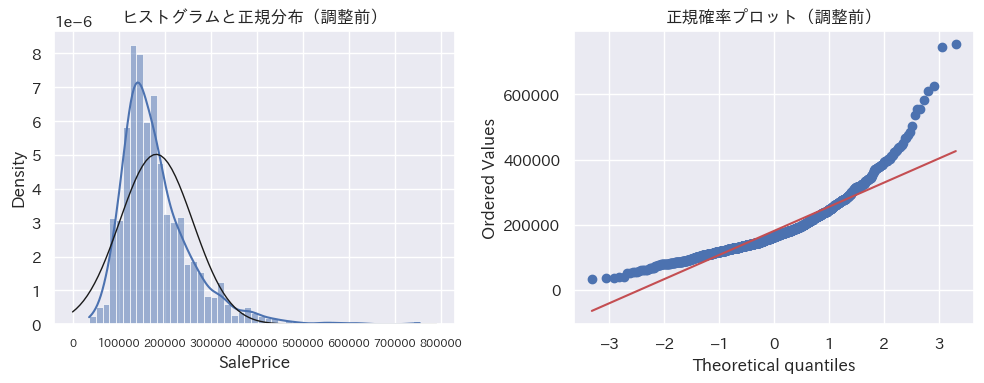

In [19]:
data = df_train["SalePrice"]

# 調整前の状態を再度確認
print("-" * 10, "describe", "-" * 10)
print(round(data.describe(), 1))

# 歪度と尖度
skewness = data.skew()
kurtosis = data.kurtosis()
print(f"歪度(Skewness: {skewness})")
print(f"尖度(Kurtosis: {kurtosis})")

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data, stat="density", kde=True, ax=ax[0])
ax[0].set_title("ヒストグラムと正規分布（調整前）")
ax[0].tick_params(axis="x", labelsize=8)

xmin, xmax = ax[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(data), np.std(data))
ax[0].plot(x, p, "k", linewidth=1)

res = stats.probplot(data, plot=ax[1])
ax[1].set_title("正規確率プロット（調整前）")

plt.tight_layout()
plt.show()

---------- describe ----------
count    1458.0
mean       12.0
std         0.4
min        10.5
25%        11.8
50%        12.0
75%        12.3
max        13.5
Name: SalePrice, dtype: float64
歪度(Skewness: 0.12156821443518166)
尖度(Kurtosis: 0.8047636129011364)


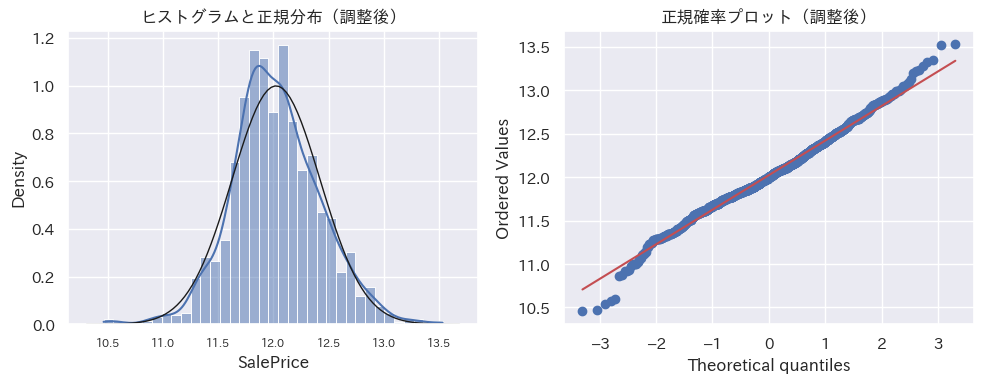

In [20]:
# SalePriceに対数変換を適用し、歪度・ヒストグラム・QQプロットを確認

data = np.log(df_train["SalePrice"])

print("-" * 10, "describe", "-" * 10)
print(round(data.describe(), 1))

skewness = data.skew()
kurtosis = data.kurtosis()
print(f"歪度(Skewness: {skewness})")
print(f"尖度(Kurtosis: {kurtosis})")

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data, stat="density", kde=True, ax=ax[0])
ax[0].set_title("ヒストグラムと正規分布（調整後）")
ax[0].tick_params(axis="x", labelsize=8)

xmin, xmax = ax[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(data), np.std(data))
ax[0].plot(x, p, "k", linewidth=1)

res = stats.probplot(data, plot=ax[1])
ax[1].set_title("正規確率プロット（調整後）")

plt.tight_layout()
plt.show()

# 結果、良さそうなのでdf_train["SalePrice"]を更新
df_train["SalePrice"] = data

## カテゴリカル変数のエンコーディング1
順番が意味を成す特徴量について（マップベースのカテゴリーエンコーディング）

In [21]:
# 順番が意味を成すデータ品質(*Qual)・状態(*Cond)等には、マップベースのカテゴリーエンコーディングを適用していきます
# これめっちゃ面倒だけど…本当にこんなに手動でやってやらないといかんのか？特徴量が多いから面倒なのは仕方ないのか？
# 面倒なのは、カテゴリ間に順序があるものとないもので分けてエンコーディングをしているため。全部one-hotエンコーディングするとどうなる？

datasets = [df_train, df_test]
# 以下では、ラベル付の種類ごとにfor文を作って回しているが、何かもっとスマートに書けないか？

# 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'について
# これらは'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0でラベル付け
label_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
cols = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
]
for i in range(len(datasets)):
    for col in cols:
        datasets[i][col] = datasets[i][col].map(label_mapping).astype(int)

# 'BsmtExposure'について
# これらは'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0でラベル付け
label_mapping = {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "None": 0}
cols = ["BsmtExposure"]
for i in range(len(datasets)):
    for col in cols:
        datasets[i][col] = datasets[i][col].map(label_mapping).astype(int)

# 'GarageFinish'について
# これらは'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0でラベル付け
label_mapping = {"Fin": 3, "RFn": 2, "Unf": 1, "None": 0}
cols = ["GarageFinish"]
for i in range(len(datasets)):
    for col in cols:
        datasets[i][col] = datasets[i][col].map(label_mapping).astype(int)

# 'BsmtFinType1', 'BsmtFinType2'について
# これらは'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0でラベル付け
label_mapping = {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "None": 0}
cols = ["BsmtFinType1", "BsmtFinType2"]
for i in range(len(datasets)):
    for col in cols:
        datasets[i][col] = datasets[i][col].map(label_mapping).astype(int)

## 各特徴量（説明変数）の分布の調整

In [22]:
# 各特徴量の分布についても歪度調整を行う。目的変数SalePriceについては対数変換を行ったが、こっちではBox-Cox変換を行う

# データ分析において、対数変換（`np.log`）と Box-Cox 変換（`scipy.special.boxcox1p`）は、データの分布を正規分布に近づけるために使用されるが、それぞれ異なる特徴と利点があります。

# ### 対数変換（`np.log`）
# - **方法**: 自然対数を取る変換。
#   ```python
#   np.log(x)
#   ```
# - **特性**:
#   - 数値が正でなければならない（ゼロや負の数値に対しては定義されない）。
#   - 変換後のデータが非常に小さい範囲になるため、元のデータのスケールが大きく影響する。
#   - データの分布が正のスキューを持つ場合に有効。

# ### Box-Cox 変換（`scipy.special.boxcox1p`）
# - **方法**: パラメータ λ（lambda）に基づく、非線形なパワー変換。
#   ```python
#   from scipy.special import boxcox1p
#   boxcox1p(x, λ)
#   ```
# - **特性**:
#   - λ パラメータにより、変換の形状を調整できるため、データに応じて最適な変換を見つけやすい。
#   - x が非負（ゼロを含む）であれば使用可能。
#   - λ = 0 のとき、`boxcox1p(x, λ)` は `np.log1p(x)`（x+1 の対数変換）と同等。
#   - より広い範囲のデータ分布を正規分布に近づけることができる。

# ### 違いのまとめ
# - **使用範囲**:
#   - `np.log`: 正のデータに限定される。
#   - `boxcox1p`: 非負のデータに対応。
# - **柔軟性**:
#   - `np.log`: 固定の変換方法。
#   - `boxcox1p`: λ パラメータにより柔軟な調整が可能。
# - **スキュー調整**:
#   - `np.log`: 主に正のスキューを持つデータに対して効果的。
#   - `boxcox1p`: λ の調整により、より多様な分布のデータに対応可能。

In [23]:
# それぞれの特徴量の歪度を確認する

# データの結合
ntrain = len(df_train)
df_all_data = pd.concat([df_train, df_test])

# 数値変数（カテゴリ変数ではなく）であるものを特定
# https://note.nkmk.me/python-pandas-select-dtypes/#include pandas.DataFrameから特定の型の列を抽出・除外するselect_dtypesについて
numeric_feats = df_all_data.select_dtypes(include="number").columns

# 各数値変数の歪度を計算し、降順にソート。そしてその中で特に歪度が大きい（abs > 0.75）ものを取り出す
skew_bfBoxCox = (
    df_all_data[numeric_feats]
    .apply(lambda x: stats.skew(x.dropna()), axis=0)
    .sort_values(ascending=False)
)
skew_bfBoxCox = skew_bfBoxCox[abs(skew_bfBoxCox) > 0.75]

print(
    f"There are {skew_bfBoxCox.shape[0]} skewed numerical features to Box Cox transform (abs > 0.75)"
)
print(skew_bfBoxCox)

There are 31 skewed numerical features to Box Cox transform (abs > 0.75)
MiscVal          21.939672
PoolQC           19.548879
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
BsmtFinType2      3.150951
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
MSSubClass        1.375131
ExterCond         1.315069
1stFlrSF          1.257286
BsmtExposure      1.119066
LotFrontage       1.102764
GrLivArea         1.068750
TotalSF           1.009157
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
ExterQual         0.783456
BsmtQual         -1.271611
GarageQual       -3.262260
GarageCond       -3.381673
BsmtCond         -3.602661
GarageYrBlt      -3.904632
dtype: float64


In [24]:
# Box-Cox変換をしていく
skewed_index = skew_bfBoxCox.index
lam = 0.15  # Box-Cox変換におけるパラメータλを設定（天下り式に教材の値を設定）→本来ここは各特徴量毎に適切なλを設定する必要あり？
skew_aftBoxCox = pd.Series(index=skewed_index)

# 各数値変数に対してBox-Cox変換を適用し、列の値を更新
for idx in skewed_index:
    df_all_data[idx] = special.boxcox1p(df_all_data[idx], lam)
    skew_aftBoxCox[idx] = stats.skew(df_all_data[idx])

pd.DataFrame({"Skew bf Box-Cox": skew_bfBoxCox, "Skew aft Box-Cox": skew_aftBoxCox})

# Box-Cox変換を適用したことにより、概ね歪度が改善した
# だが、一部Box-Cox変換によって歪度が増大しているものもある。明らかに不適切だが、とりあえず教材通りこのまま進める

,Skew bf Box-Cox,Skew aft Box-Cox
MiscVal,21.939672,5.594963
PoolQC,19.548879,18.692748
PoolArea,17.688664,15.759529
LotArea,13.109495,0.177735
LowQualFinSF,12.084539,8.741030
3SsnPorch,11.372080,8.921650
KitchenAbvGr,4.300550,3.697303
BsmtFinSF2,4.144503,2.563235
EnclosedPorch,4.002344,2.024321
ScreenPorch,3.945101,2.977052


## カテゴリカル変数のエンコーディング2
順番が意味を成さない特徴量について（One-hot encoding）

In [25]:
# 現時点ではまだdf_trainとdf_testはdf_all_dataの値に更新されていない。なので初めはdf_all_dataを使いながら作業を進めていく

# トレーニングデータの行数を取得
ntrain = len(df_train)

# one-hot encodingを実行
df_all_data = pd.get_dummies(df_all_data)

# df_all_dataを分割し、df_trainとdf_testに格納して中身を更新
df_train = df_all_data[:ntrain]
df_test = df_all_data[ntrain:]

# これまでの操作により、df_testの方に"SalePrice"行が入ってしまっているのでこれを削除
df_test = df_test.drop(["SalePrice"], axis=1)

# データの様子を表示
display(df_train)
display(df_test)
# 教材よりも行数が3つ少ない…何故？

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,...,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.684507,5.831328,19.212182,7,5,2003,2003,8.059126,1.820334,1.540963,1.820334,1.540963,0.730463,6,11.170327,0.730463,0.000000,7.483296,856.0,5,11.692623,11.686189,0.0,13.698888,1.0,0.000000,2,1,3,0.730463,4,8,0,0,14.187527,2,2.0,548.0,1.540963,1.540963,0.000000,5.714669,0.000000,0.0,0.0,0.0,0.0,0.000000,2,2008,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,3.858807,6.221214,19.712205,6,8,1976,1976,0.000000,1.540963,1.540963,1.820334,1.540963,1.820334,5,12.062832,0.730463,0.000000,8.897844,1262.0,5,12.792276,0.000000,0.0,12.792276,0.0,0.730463,2,0,3,0.730463,3,6,1,3,14.145138,2,2.0,460.0,1.540963,1.540963,9.010206,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,5,2007,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,5.684507,5.914940,20.347241,7,5,2001,2002,7.646538,1.820334,1.540963,1.820334,1.540963,1.194318,6,10.200343,0.730463,0.000000,9.917060,920.0,5,11.892039,11.724598,0.0,13.832085,1.0,0.000000,2,1,3,0.730463,4,6,1,3,14.184404,2,2.0,608.0,1.540963,1.540963,0.000000,5.053371,0.000000,0.0,0.0,0.0,0.0,0.000000,9,2008,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
4,5.968981,5.684507,19.691553,7,5,1915,1970,0.000000,1.540963,1.540963,1.540963,1.820334,0.730463,5,8.274266,0.730463,0.000000,10.468500,756.0,4,12.013683,11.354094,0.0,13.711364,1.0,0.000000,1,0,3,0.730463,4,7,1,4,14.179714,1,3.0,642.0,1.540963,1.540963,0.000000,4.745132,8.797736,0.0,0.0,0.0,0.0,0.000000,2,2006,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
5,5.684507,6.314735,21.325160,8,5,2000,2000,9.391827,1.820334,1.540963,1.820334,1.540963,1.540963,6,10.971129,0.730463,0

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,...,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,3.858807,6.221214,20.479373,5,6,1961,1961,0.000000,1.540963,1.540963,1.540963,1.540963,0.730463,3,10.105326,1.194318,7.397498,8.780689,882.0,3,11.818680,0.000000,0.0,11.818680,0.0,0.000000,1,0,2,0.730463,3,5,0,0,14.121376,1,1.0,730.0,1.540963,1.540963,7.338607,0.000000,0.0,0.0,7.020909,0.0,0.0,0.000000,6,2010,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1462,3.858807,6.244956,21.327220,6,6,1958,1958,6.808145,1.540963,1.540963,1.540963,1.540963,0.730463,5,11.901094,0.730463,0.000000,9.752379,1329.0,3,12.943735,0.000000,0.0,12.943735,0.0,0.000000,1,1,3,0.730463,4,6,0,0,14.116605,1,1.0,312.0,1.540963,1.540963,9.672623,4.792130,0.0,0.0,0.000000,0.0,0.0,20.777526,6,2010,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1463,5.684507,6.073289,21.196905,5,5,1997,1998,0.000000,1.540963,1.540963,1.820334,1.540963,0.730463,6,11.476685,0.730463,0.000000,7.293500,928.0,4,11.916131,11.151348,0.0,13.551272,0.0,0.000000,2,1,3,0.730463,3,6,1,3,14.178149,3,2.0,482.0,1.540963,1.540963,8.232627,4.697012,0.0,0.0,0.000000,0.0,0.0,0.000000,3,2010,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1464,5.684507,6.172972,19.865444,6,6,1998,1998,3.858807,1.540963,1.540963,1.540963,1.540963,0.730463,6,10.749651,0.730463,0.000000,9.207511,926.0,5,11.910125,11.062536,0.0,13.504453,0.0,0.000000,2,1,3,0.730463,4,7,1,4,14.179714,3,2.0,470.0,1.540963,1.540963,9.459637,4.792130,0.0,0.0,0.000000,0.0,0.0,0.000000,6,2010,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1465,7.020909,5.093857,17.257255,8,5,1992,1992,0.000000,1.820334,1.540963,1.820334,1.540963,0.730463,5,8.720

# 3. モデルの選択と構築

## 使用する機械学習アルゴリズムの選定

In [26]:
# 今回選定したアルゴリズムと特徴

# LinearRegression: 線形回帰モデルは、線形関係を仮定し、特徴量と目的変数との線形関係を学習します。最小二乗法を使用してモデルを適合させ、回帰係数を推定します。特徴としては、線形関係がある場合に効果的です。
# Ridge: リッジ回帰は線形回帰の一種で、L2正則化を使用して過学習を抑制することを特徴とします。正則化項は回帰係数の大きさを制約します。α（alpha）は正則化の強度を調整するハイパーパラメータです。
# Lasso: ラッソ回帰は線形回帰の一種で、L1正則化を使用して過学習を抑制することを特徴とします。L1正則化は特徴量の選択を促進し、いくつかの特徴量を重要視する傾向があります。α（alpha）は正則化の強度を調整するハイパーパラメータです。
# DecisionTreeRegressor: 決定木回帰は決定木をベースにした回帰モデルで、特徴量の値に基づいて目的変数を予測します。特徴としては、非線形な関係をキャプチャできる点があります。
# RandomForestRegressor: ランダムフォレスト回帰は複数の決定木を組み合わせたアンサンブルモデルです。複数の決定木を使用することで、過学習を抑制し、高い予測性能を提供します。特徴としては、非線形関係のモデリングに有効です。
# XGBRegressor: XGBoost回帰は勾配ブースティングモデルで、勾配ブースティングのアンサンブル技術を使用して、多数の決定木モデルを組み合わせて予測を行います。特徴としては、高い予測性能と汎化能力があります。
# LGBMRegressor: LightGBM回帰も勾配ブースティングモデルの一種で、LightGBMライブラリを使用します。高速で効率的な勾配ブースティングアルゴリズムを提供し、大規模なデータセットに適しています。高速で正確な予測が特徴です。

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import root_mean_squared_error

# 評価指標（コンペより引用）
# 提出物は、予測値の対数と観測された販売価格の対数との間のRMSE（Root-Mean-Squared-Error）で評価される。(対数をとるということは、高価な住宅と安価な住宅の予測誤差が同じように結果に影響することを意味する)。

# X: 説明変数、y: 目的変数
X = df_train.drop(["SalePrice"], axis=1)
y = df_train["SalePrice"]

# データ分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pythonでは関数やオブジェクトをリストに入れることができます。ここでは、modelというリストに様々な回帰モデルのインスタンスを格納しています。
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
]
# 結果を保存するためのデータフレームを作成しておく
results = pd.DataFrame(columns=["Model", "RMSE"])


for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    results = pd.concat(
        [results, pd.DataFrame({"Model": [model_name], "RMSE": [rmse]})],
        ignore_index=True,
    )

results = results.sort_values(by="RMSE")

display(results)
print("なお、目的変数の各統計量(y.describe())は以下の通り:")
display(y.describe())

C:\Users\NDY02\AppData\Local\Temp\ipykernel_19120\3884827815.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3417
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 151
[LightGBM] [Info] Start training from score 12.023355


,Model,RMSE
1,Ridge,0.117716
0,LinearRegression,0.129369
6,LGBMRegressor,0.132729
5,XGBRegressor,0.138961
4,RandomForestRegressor,0.142201
3,DecisionTreeRegressor,0.230781
2,Lasso,0.251972


なお、目的変数の各統計量(y.describe())は以下の通り:


count    1458.000000
mean       12.024009
std         0.399715
min        10.460242
25%        11.774713
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

## モデルのチューニング（グリッドサーチ）

In [28]:
# モデル選択にてリッジ回帰が一番RMSEが低い結果になったため、今度はRidge回帰の中でハイパーパラメータのalpha値を変えていき、RMSEが一番小さくなるalpha値を確認していく
# グリッドサーチでは、指定したハイパーパラメータの候補値を組み合わせて全ての組み合わせを試し、最適な組み合わせを見つける

from sklearn.model_selection import GridSearchCV

# 開始値（最小値）と終了値（最大値）を指定
start_alpha = 0.01
end_alpha = 100

# 対数スケールでalphaの値を20個生成
alphas = np.logspace(np.log10(start_alpha), np.log10(end_alpha), num=20)

ridge = Ridge()

# グリッドサーチのパラメータグリッドを定義
param_grid = {"alpha": alphas}

# クロスバリデーションとグリッドサーチを組み合わせて最適なalphaを探索
grid_search = GridSearchCV(
    ridge, param_grid, cv=5, scoring="neg_root_mean_squared_error"
)  # グリッドサーチの前準備
grid_search.fit(
    X_train, y_train
)  # ここでグリッドサーチを実行。各αを設定したモデルについて学習をさせて、どのαを使ったときに最良の結果が得られるのか調べている

best_alpha = grid_search.best_params_["alpha"]
best_score = grid_search.best_score_
print(f"Best alpha: {best_alpha}")
print(f"Best score(negRMSE): {best_score}")

# チューニング前と比べて、RMSEが減少している（0.117716→0.113794）
# このRMSEでRMSE/標準偏差を計算すると、=0.2847となりまあまあ小さい。つまりそこそこの精度がある

Best alpha: 14.38449888287663
Best score(negRMSE): -0.11379463463486905


In [29]:
# 最適なalphaでRidge回帰モデルを再訓練
model = Ridge(alpha=best_alpha).fit(X, y)

# テストデータに対して予測を行い、exp(x) - 1を適用して元のスケールに戻す
# 目的変数(SalePrice)の歪度調整のときに行った処理（data = np.log(df_train["SalePrice"])）によって、テストデータの予測結果SalePriceはlog対数が適用されている。そのため、予測結果に対して元のスケールに戻す処理が必要
# 疑問：対数変換するときに、log(y + 1)としていなかったのに、exp(x) - 1として良いのか？
sub_pred = np.expm1(model.predict(df_test))
submission = pd.DataFrame({"Id": df_test.index, "SalePrice": sub_pred})
submission.to_csv("train_test_submission/submission.csv", index=False)

,feature,coefficient
51,MSZoning_C (all),0.114979
83,Neighborhood_Crawfor,0.079027
23,GrLivArea,0.073950
204,Functional_Typ,0.066367
99,Neighborhood_StoneBr,0.063951
148,Exterior1st_BrkFace,0.053297
3,OverallQual,0.052692
50,TotalSF,0.043990
4,OverallCond,0.043676
52,MSZoning_FV,0.043031


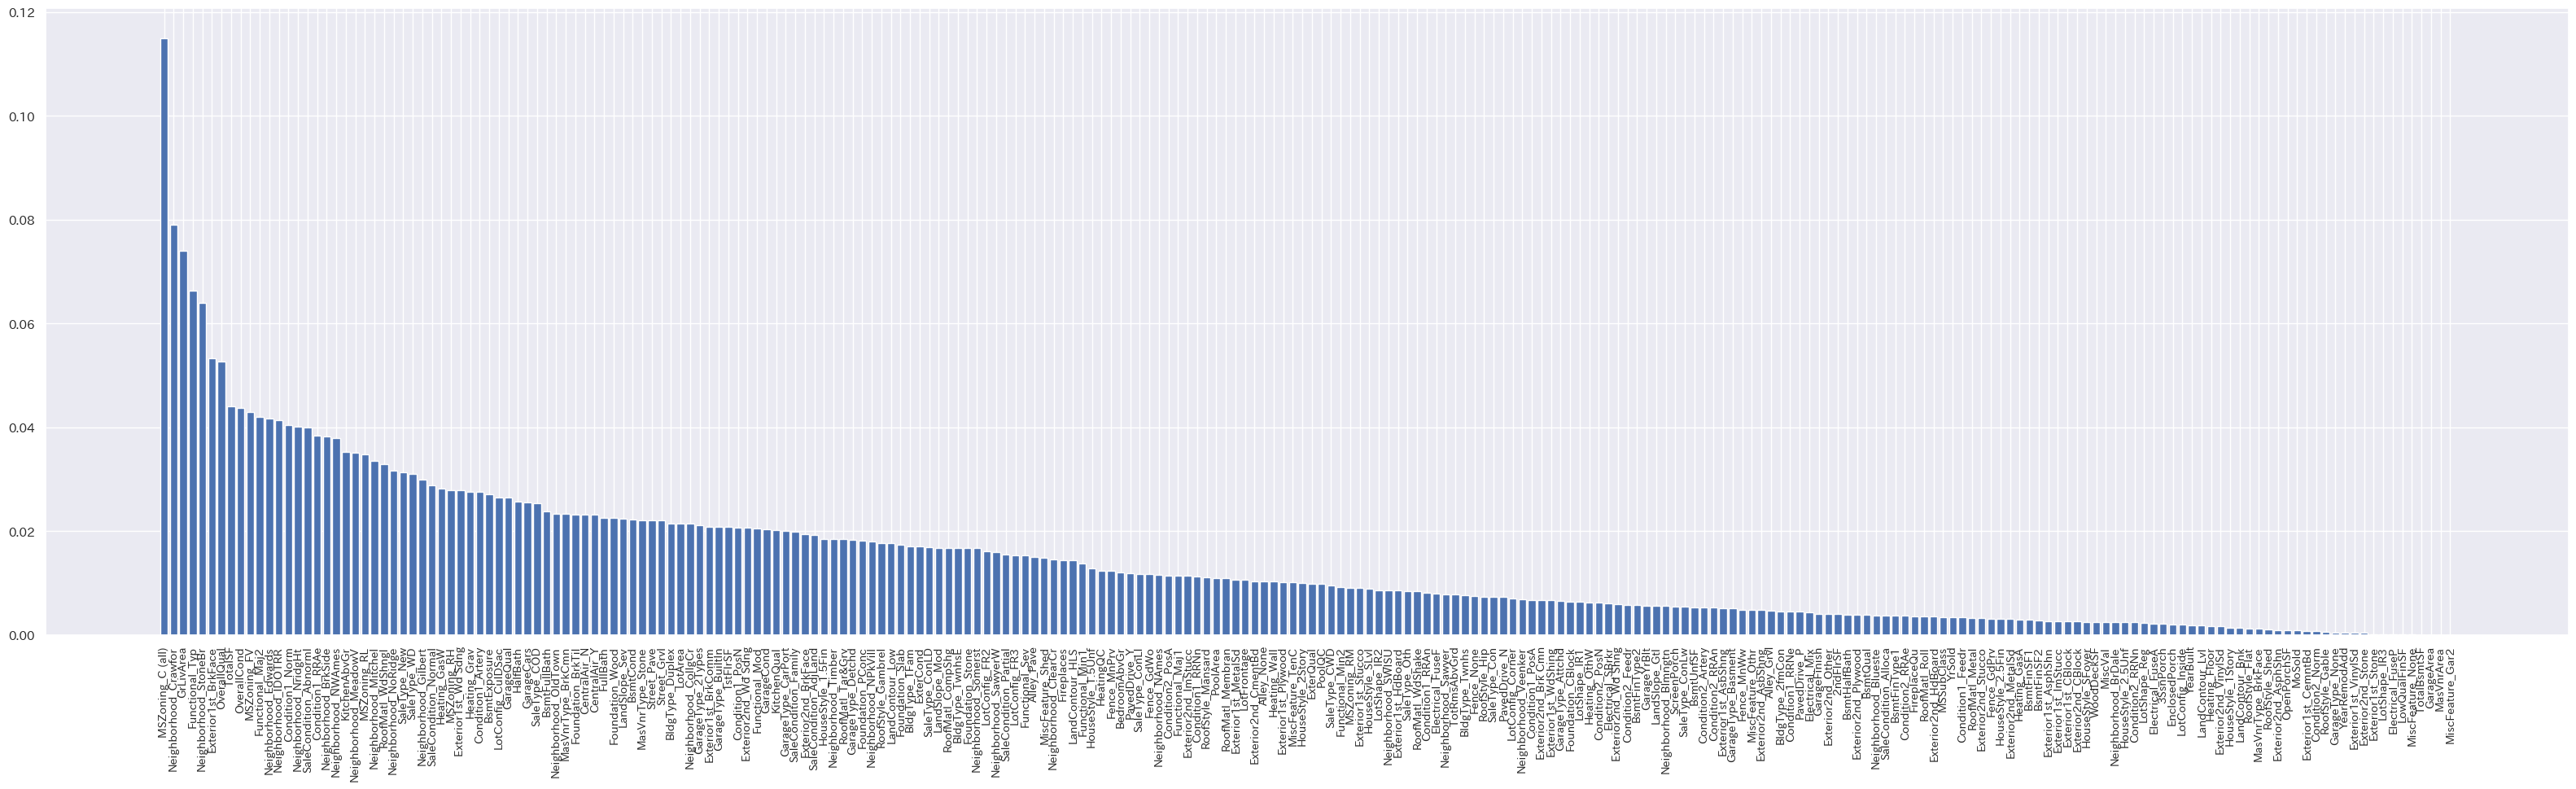

In [30]:
# memo:他にやりたいこと
# 特徴量重要度は？→ridge回帰だと正則化してるとかで？？

feature_names = X_train.columns
coefficients = abs(model.coef_)

df_model_coef = pd.DataFrame({"feature": feature_names, "coefficient": coefficients})
df_model_coef = df_model_coef.sort_values(by="coefficient", ascending=False)

display(df_model_coef.head(10))
plt.figure(figsize=(40, 10))
plt.bar(df_model_coef["feature"], df_model_coef["coefficient"])
plt.xticks(fontsize=10, rotation=90)
plt.show()